In [50]:
import pandas as pd
import time
from sqlalchemy import create_engine
import pymysql
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import de la base de donnée

In [2]:
host = 'localhost' 
user = 'root' 
password = 'root'  
database = 'immobilier'

conn = pymysql.connect(host=host, user=user, password=password, database=database)
engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}')
df = pd.read_csv('transac_immo_good.csv')
df

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\1976359511.py:8: DtypeWarning: Columns (8,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('transac_immo_good.csv')


,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere,Type_local,Nombre_pieces_principales,Adresse,Code_postal,Commune,...,3eme_lot,4eme_lot,5eme_lot,Carrez_1er_lot,Carrez_2eme_lot,Carrez_3eme_lot,Carrez_4eme_lot,Carrez_5eme_lot,Surface_reelle_batiment,Surface_terrain
0,1,Vente,M_1,13/12/2022,"221000,00",Maison,4.0,5040.0 CLOS CITADELLE,1379,SAINT-MAURICE-DE-REMENS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.0,134.0
1,2,Vente,M_2,13/09/2022,"143000,00",Maison,3.0,379.0 BOUCLE DE SULIGNAT,1025,BAGE-DOMMARTIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.0,871.0
2,3,Vente,M_3,14/04/2022,"76000,00",Maison,1.0,5137.0 GENEVRAY,1185,PLATEAU D'HAUTEVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,26.0
3,4,Vente,M_4,01/08/2022,"250000,00",Maison,6.0,2.0 LES GRANGES TEILLIERES,1185,PLATEAU D'HAUTEVILLE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150.0,886.0
4,5,Vente,M_5,06/07/2022,"60000,00",Maison,5.0,5271.0 LES MILLIERES,1025,BAGE-DOMMARTIN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,132.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471820,1471821,Vente,M_747942,16/09/2022,"170000,00",Maison,5.0,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145.0,351.0
1471821,1471822,Vente,M_747943,11/05/2022,"15000,00",Maison,3.0,12.0 RLE 46,974013,SAINT-LEU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.0,444.0
1471822,1471823,Vente,M_747944,11/05/2022,"15000,00",Maison,4.0,12.0 RLE 46,974013,SAINT-LEU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,72.0,444.0
1471823,1471824,Vente,M_747945,11/05/2022,"15000,00",Maison,2.0,12.0 RLE 46,974013,SAINT-LEU,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,444.0


Création des différents DataFrame

In [3]:
colonnes_selectionnees = ["Adresse", "Code_postal", "Commune", "Département", "Regions"]

df_localisations = df[colonnes_selectionnees]

df_localisations['ID_Bienisation'] = range(1, len(df) + 1)

ID_Bienisation = df_localisations.pop('ID_Bienisation')
df_localisations.insert(0, 'ID_Bienisation', ID_Bienisation)
df_localisations

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\3748736808.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_localisations['ID_Bienisation'] = range(1, len(df) + 1)


,ID_Bienisation,Adresse,Code_postal,Commune,Département,Regions
0,1,5040.0 CLOS CITADELLE,1379,SAINT-MAURICE-DE-REMENS,Ain,Auvergne-Rhône-Alpes
1,2,379.0 BOUCLE DE SULIGNAT,1025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
2,3,5137.0 GENEVRAY,1185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
3,4,2.0 LES GRANGES TEILLIERES,1185,PLATEAU D'HAUTEVILLE,Ain,Auvergne-Rhône-Alpes
4,5,5271.0 LES MILLIERES,1025,BAGE-DOMMARTIN,Ain,Auvergne-Rhône-Alpes
...,...,...,...,...,...,...
1471820,1471821,22.0 RUE DES ALAMANDAS,974019,SAINTE ROSE,La Réunion,La Réunion
1471821,1471822,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
1471822,1471823,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion
1471823,1471824,12.0 RLE 46,974013,SAINT-LEU,La Réunion,La Réunion


In [4]:
df_ventes = df[['Transaction_unique', 'Type_vente', 'ID_Bien', 'Date', 'Valeur_fonciere']]
df_biens = df[['ID_Bien', 'Type_local', 'Surface_reelle_batiment', 'Nombre_pieces_principales', 'Surface_terrain', 'Nombre_lots']]
df_lots = df[['1er_lot', '2eme_lot', '3eme_lot', '4eme_lot', '5eme_lot', 'Carrez_1er_lot', 'Carrez_2eme_lot', 'Carrez_3eme_lot', 'Carrez_4eme_lot', 'Carrez_5eme_lot']]
df_localisations.insert(6, 'ID_Bien', df[['ID_Bien']])

Import des DataFrame vers MySQL

In [38]:
#df_ventes.to_sql('ventes', con=engine, if_exists='replace', index=False)

1471825

In [5]:
#df_biens.to_sql('biens_1', con=engine, if_exists='replace', index=False)

1471825

In [6]:
#df_lots.to_sql('lots', con=engine, if_exists='replace', index=False)

1471825

In [5]:
#df_localisations.to_sql('localisations_1', con=engine, if_exists='replace', index=False)

1471825

Requêtes SQL

1/ Nombre d’appartements et Maisons vendus en 2022

In [6]:
query_nombres = """
SELECT count(*) as nb_maisons_appart, Type_Local
FROM biens_1
LEFT JOIN ventes 
ON biens_1.ID_Bien = ventes.ID_Bien
WHERE Type_local LIKE '%Appartement%' OR Type_local LIKE '%Maison%' AND Type_vente LIKE '%Vente%'
GROUP BY Type_local
"""

df_nombres = pd.read_sql(query_nombres, conn)
df_nombres

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\987527720.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_nombres = pd.read_sql(query_nombres, conn)


,nb_maisons_appart,Type_Local
0,744942,Maison
1,585515,Appartement


2/ Nombre de biens vendus par trimestre

In [7]:
query_trimestres = """
SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, COUNT(*) AS Nombre_de_biens_vendus
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre;
"""

df_trimestres = pd.read_sql(query_trimestres, conn)
df_trimestres

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\1338424266.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trimestres = pd.read_sql(query_trimestres, conn)


,Trimestre,Nombre_de_biens_vendus
0,1,341413
1,2,386302
2,3,395501
3,4,348609


3/ Proportion des ventes de biens par trimestre

In [8]:
query_trimestres_proportion = """
SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, COUNT(*) / (SELECT COUNT(*) FROM ventes) * 100 AS Proportions_de_biens_vendus
FROM ventes
GROUP BY Trimestre
  """

df_trimestres_proportion = pd.read_sql(query_trimestres_proportion, conn)
df_trimestres_proportion

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\2822606654.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_trimestres_proportion = pd.read_sql(query_trimestres_proportion, conn)


,Trimestre,Proportions_de_biens_vendus
0,1,23.1966
1,2,26.2465
2,3,26.8715
3,4,23.6855


4/ Proportion d’appartements vendus par nombre de pièces

In [9]:
query_proportion_A ="""
SELECT count(*) / (select COUNT(*) from ventes WHERE ID_Bien LIKE 'A%')* 100 as Proportions, Nombre_pieces_principales
FROM biens_1
WHERE Type_local LIKE 'Appartement'
GROUP BY Nombre_pieces_principales
"""

df_proportion_A = pd.read_sql(query_proportion_A, conn)
df_proportion_A

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\4247347405.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_proportion_A = pd.read_sql(query_proportion_A, conn)


,Proportions,Nombre_pieces_principales
0,3.9359,5.0
1,29.9309,3.0
2,15.5190,4.0
3,18.6461,1.0
4,30.6310,2.0
5,0.1944,7.0
6,0.7667,6.0
7,0.2422,0.0
8,0.0722,8.0
9,0.0125,10.0


5/ Les 10 départements où il y a eu le plus de ventes immobilières. 

In [11]:
query_top10 ="""
SELECT count(*) as biens_vendus, Département
FROM localisations_1
LEFT JOIN biens_1 ON localisations_1.ID_Bien = biens_1.ID_Bien
GROUP BY Département
ORDER BY Biens_vendus DESC
LIMIT 10
"""

df_top10 = pd.read_sql(query_top10, conn)
df_top10

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\3389664718.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top10 = pd.read_sql(query_top10, conn)


,biens_vendus,Département
0,50645,Nord
1,48071,Paris
2,43911,Bouches-du-Rhône
3,41670,Var
4,40215,Alpes-Maritimes
5,39022,Rhône
6,38380,Gironde
7,34456,Hérault
8,31419,Loire-Atlantique
9,31033,Haute-Garonne


6/ Les 10 départements où il y en a eu le moins

In [12]:
query_pire10 ="""
SELECT count(*) as Biens_vendus, Département
FROM localisations_1
LEFT JOIN biens_1 ON localisations_1.ID_Bien = biens_1.ID_Bien
GROUP BY Département
ORDER BY Biens_vendus ASC
LIMIT 10
"""

df_pire10 = pd.read_sql(query_pire10, conn)
df_pire10

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\4261937017.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_pire10 = pd.read_sql(query_pire10, conn)


,Biens_vendus,Département
0,1748,Lozère
1,1962,Guyane
2,2841,Territoire de Belfort
3,3421,Martinique
4,3452,Haute-Corse
5,3639,Corse-du-Sud
6,3693,Cantal
7,3709,Creuse
8,3763,Guadeloupe
9,3811,Haute-Marne


7/ Prix moyen du mètre carré en IDF

In [13]:
query_prixmoyen = """
SELECT SUM(Valeur_fonciere) / SUM(Surface_terrain) as prix_moyen
FROM biens_1
JOIN localisations_1 
ON biens_1.ID_Bien = localisations_1.ID_Bien
JOIN ventes
ON localisations_1.ID_Bien = ventes.ID_Bien
WHERE Regions LIKE '%Île-de-France%';
"""

df_prixmoyen = pd.read_sql(query_prixmoyen, conn)
df_prixmoyen

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\791904620.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prixmoyen = pd.read_sql(query_prixmoyen, conn)


,prix_moyen
0,4407.342152


8/ Liste des 10 appartements les plus chers avec le département et le nombre de mètres carrés.

In [14]:
query_prix10 = """
SELECT *
FROM biens_1
JOIN localisations_1 
ON biens_1.ID_Bien = localisations_1.ID_Bien
JOIN ventes
ON localisations_1.ID_Bien = ventes.ID_Bien
order by Valeur_fonciere desc
LIMIT 10
"""

df_prix10 = pd.read_sql(query_prix10, conn)
df_prix10

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\138947326.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_prix10 = pd.read_sql(query_prix10, conn)


,ID_Bien,Type_local,Surface_reelle_batiment,Nombre_pieces_principales,Surface_terrain,Nombre_lots,ID_Bienisation,Adresse,Code_postal,Commune,Département,Regions,ID_Bien,Transaction_unique,Type_vente,ID_Bien,Date,Valeur_fonciere
0,A_472305,Appartement,65.0,3.0,772.0,0,1235933,586.0 AV VICTOR HUGO,83061,FREJUS,Var,Provence-Alpes-Côte d'Azur,A_472305,1235933,Vente,A_472305,02/03/2022,"999999,00"
1,A_472306,Appartement,80.0,4.0,772.0,0,1235934,586.0 AV VICTOR HUGO,83061,FREJUS,Var,Provence-Alpes-Côte d'Azur,A_472306,1235934,Vente,A_472306,02/03/2022,"999999,00"
2,A_583002,Appartement,78.0,5.0,3244.0,0,1465799,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_583002,1465799,Vente,A_583002,29/12/2022,"999990,25"
3,A_582997,Appartement,28.0,1.0,3244.0,0,1465793,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_582997,1465793,Vente,A_582997,29/12/2022,"999990,25"
4,A_583003,Appartement,62.0,3.0,3244.0,0,1465801,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_583003,1465801,Vente,A_583003,29/12/2022,"999990,25"
5,A_583001,Appartement,29.0,1.0,3244.0,0,1465798,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_583001,1465798,Vente,A_583001,29/12/2022,"999990,25"
6,A_582995,Appartement,43.0,2.0,3244.0,0,1465791,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_582995,1465791,Vente,A_582995,29/12/2022,"999990,25"
7,A_582998,Appartement,71.0,4.0,3244.0,0,1465794,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_582998,1465794,Vente,A_582998,29/12/2022,"999990,25"
8,A_582994,Appartement,56.0,3.0,3244.0,0,1465789,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_582994,1465789,Vente,A_582994,29/12/2022,"999990,25"
9,A_582996,Appartement,44.0,2.0,3244.0,0,1465792,1.0 RUE DES TISSERINS,974016,SAINT PIERRE,La Réunion,La Réunion,A_582996,1465792,Vente,A_582996,29/12/2022,"999990,25"


9/ Taux d’évolution du nombre de ventes entre le premier et le second trimestre de 2020.

In [15]:
query_evolution = """
SELECT ((select Nombre_de_biens_vendus 
FROM(SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, COUNT(*) AS Nombre_de_biens_vendus
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre) as new
WHERE Trimestre LIKE '2')
  - (select Nombre_de_biens_vendus 
FROM(SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, COUNT(*) AS Nombre_de_biens_vendus
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre) as new
WHERE Trimestre LIKE '1')) / (select Nombre_de_biens_vendus 
FROM(SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, COUNT(*) AS Nombre_de_biens_vendus
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre) as new
WHERE Trimestre LIKE '1') as Taux_evolution
"""

df_evolution = pd.read_sql(query_evolution, conn)
df_evolution

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\2803032387.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_evolution = pd.read_sql(query_evolution, conn)


,Taux_evolution
0,0.1315


10/ Liste des communes où le nombre de ventes a augmenté d'au moins 20% entre le
premier et le second trimestre de 2020

Visualisation

In [54]:
query_visu = """
SELECT QUARTER(STR_TO_DATE(Date, '%d/%m/%Y')) AS Trimestre, AVG(Valeur_fonciere) AS Valeur_fonciere_moyenne
FROM ventes
GROUP BY Trimestre
ORDER BY Trimestre
"""

df_visu = pd.read_sql(query_visu, conn)
df_visu

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_14020\116902296.py:8: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



,Trimestre,Valeur_fonciere_moyenne
0,1,4.580369e+05
1,2,7.356653e+05
2,3,6.898698e+05
3,4,5.271525e+06


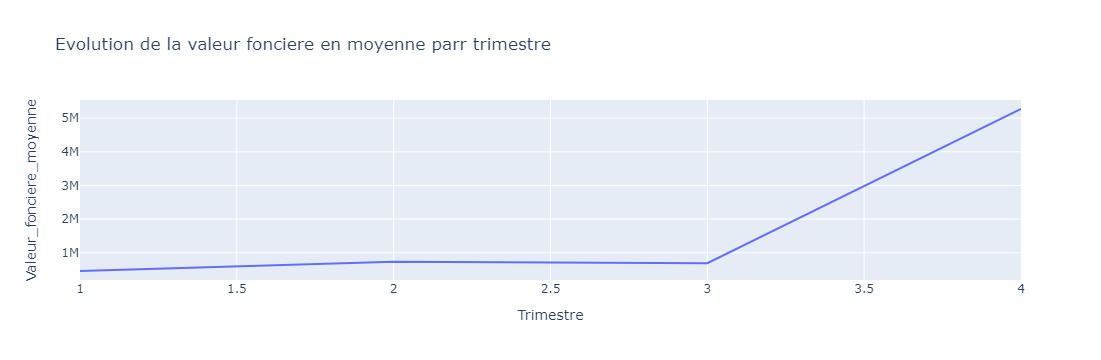

In [58]:
fig = px.line(df_visu, x="Trimestre", y="Valeur_fonciere_moyenne", title='Evolution de la valeur fonciere en moyenne parr trimestre')
fig.show()